## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Data Read/Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
        - [3.1.1 Linear Regression](#3.1.1)
        - [3.1.2 Polynomial Regression](#3.1.2)
- [4. Model](#4)
    - [4.1 Train](#4.1)
        - [4.1.1 Linear Regression](#4.1.1)
        - [4.1.2 Polynomial Regression](#4.1.2)
    - [4.2 Test](#4.2)
        - [4.2.1 Linear Regression](#4.2.1)
        - [4.2.2 Polynomial Regression](#4.2.2)
- [5. Model Evaluation](#5)
    - [5.1 Linear Regression](#5.1)
    - [5.2 Polynomial Regression](#5.2)
- [6. Conclusion](#6)

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement

We want to predict the C02 Emission produced by cars. We have many variables from the car age, the brand, the engine size, etc. In modelling we want to know which of linear regression and polynomial regression make a better prediction

<a name='1.2'></a>
## 1.2 Packages

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

<a name='1.3'></a>
## 1.3 Data Read/Import

In [65]:
df = pd.read_csv("FuelConsumption.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [66]:
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [68]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 8 numerical features:
 ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [69]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 5 categorical features:
 ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']


<a name='1.5'></a>
## 1.5 Data Split

In [107]:
#80/20 split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

<a name='1.5.1'></a>
### 1.5.1 Linear Regression

In [108]:
#FOR ENGINESIZE VS CO2EMISSIONS
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

#FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

#80/20 split
print(f'train_x1: {train_x1.shape} ({round(len(train_x1)/len(df), 1) * 100}%)')
print(f'train_y1: {train_y1.shape} ({round(len(train_y1)/len(df), 1) * 100}%)')
print(f'test_x1: {test_x1.shape} ({round(len(test_x1)/len(df), 1) * 100}%)')
print(f'test_y1: {test_y1.shape} ({round(len(test_y1)/len(df), 1) * 100}%)')
print('')

#80/20 split
print(f'train_x2: {train_x2.shape} ({round(len(train_x2)/len(df), 1) * 100}%)')
print(f'train_y2: {train_y2.shape} ({round(len(train_y2)/len(df), 1) * 100}%)')
print(f'test_x2: {test_x2.shape} ({round(len(test_x2)/len(df), 1) * 100}%)')
print(f'test_y2: {test_y2.shape} ({round(len(test_y2)/len(df), 1) * 100}%)')

train_x1: (859, 1) (80.0%)
train_y1: (859, 1) (80.0%)
test_x1: (208, 1) (20.0%)
test_y1: (208, 1) (20.0%)

train_x2: (859, 1) (80.0%)
train_y2: (859, 1) (80.0%)
test_x2: (208, 1) (20.0%)
test_y2: (208, 1) (20.0%)


<a name='1.5.2'></a>
### 1.5.2 Polynomial Regression

In [109]:
# POLYNOMIAL REGRESSION (1)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
train_x1_poly = poly.fit_transform(train_x1)

# POLYNOMIAL REGRESSION (2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
train_x2_poly = poly.fit_transform(train_x2)

#80/20 split
print(f'train_x1_poly: {train_x1_poly.shape} ({round(len(train_x1_poly)/len(df), 1) * 100}%)')
print(f'train_y1: {train_y1.shape} ({round(len(train_y1)/len(df), 1) * 100}%)')
print(f'test_x1_poly: {test_x1_poly.shape} ({round(len(test_x1_poly)/len(df), 1) * 100}%)')
print(f'test_y1: {test_y1.shape} ({round(len(test_y1)/len(df), 1) * 100}%)')
print('')

#80/20 split
print(f'train_x2_poly: {train_x1_poly.shape} ({round(len(train_x2_poly)/len(df), 1) * 100}%)')
print(f'train_y2: {train_y1.shape} ({round(len(train_y2)/len(df), 1) * 100}%)')
print(f'test_x2_poly: {test_x1_poly.shape} ({round(len(test_x2_poly)/len(df), 1) * 100}%)')
print(f'test_y2: {test_y1.shape} ({round(len(test_y2)/len(df), 1) * 100}%)')

train_x1_poly: (859, 3) (80.0%)
train_y1: (859, 1) (80.0%)
test_x1_poly: (208, 3) (20.0%)
test_y1: (208, 1) (20.0%)

train_x2_poly: (859, 3) (80.0%)
train_y2: (859, 1) (80.0%)
test_x2_poly: (208, 3) (20.0%)
test_y2: (208, 1) (20.0%)


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target/Dependent Variable

Text(0.5, 1.0, 'CO2 Emissions Distribution')

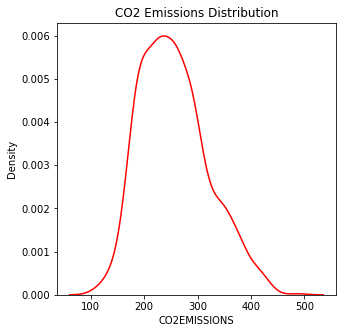

In [135]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(df['CO2EMISSIONS'], color="red")
plt.title("CO2 Emissions Distribution")

## 2.2 Feature/Independent Variables Correlation with Target/Dependent Variable

In [71]:
# Top 10 highest pearson correlation
corr_mat = df.corr().CO2EMISSIONS.sort_values(ascending=False)
corr_mat.head(8)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

From six numerical variables, five of them have very high positive correlation value ranging from 0.85 to 0.89. One variable has high negative correlation with -0.91. In this case we will only use two independent variables to try modelling simple linear regression and polynomial regression

In [136]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", df[[variables[0], variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(1, 1))
    sns.jointplot(data = df,
                   x = df[(variables[0])],
                  y = df[(variables[1])],
                  kind='reg',
                  height=4,
                  ratio=5,
                  color='red',
                  scatter_kws={'s': 5},
                  marginal_kws={'kde': True})

Correlation:  0.8741543683958124
Correlation:  0.8921285933157569


<Figure size 72x72 with 0 Axes>

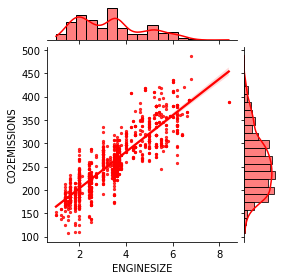

<Figure size 72x72 with 0 Axes>

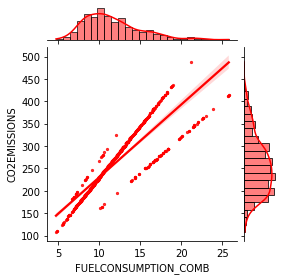

In [137]:
plotCorrelation(['ENGINESIZE', 'CO2EMISSIONS']),
plotCorrelation(['FUELCONSUMPTION_COMB', 'CO2EMISSIONS'])

<a name='3'></a>
# 3. Feature Engineering

<a name='3.1'></a>
## 3.1 Missing Values

<a name='3.1.1'></a>
### 3.1.1 Linear Regression

In [114]:
missing_data_train_count = np.isnan(train_x1).sum()
missing_data_train_percent = np.isnan(train_x1).sum() / len(train_x1) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [121]:
missing_data_test_count = np.isnan(test_x1).sum()
missing_data_test_percent = np.isnan(test_x1).sum() / len(test_x1) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [115]:
missing_data_train_count = np.isnan(train_x2).sum()
missing_data_train_percent = np.isnan(train_x2).sum() / len(train_x2) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [122]:
missing_data_test_count = np.isnan(test_x2).sum()
missing_data_test_percent = np.isnan(test_x2).sum() / len(test_x2) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


<a name='3.1.2'></a>
### 3.1.2 Polynomial Regression

In [116]:
missing_data_train_count = np.isnan(train_x1_poly).sum()
missing_data_train_percent = np.isnan(train_x1_poly).sum() / len(train_x1_poly) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [123]:
missing_data_test_count = np.isnan(test_x1).sum()
missing_data_test_percent = np.isnan(test_x1).sum() / len(test_x1) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [117]:
missing_data_train_count = np.isnan(train_x2_poly).sum()
missing_data_train_percent = np.isnan(train_x2_poly).sum() / len(train_x2_poly) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [124]:
missing_data_test_count = np.isnan(test_x2).sum()
missing_data_test_percent = np.isnan(test_x2).sum() / len(test_x2) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


<a name='4'></a>
# 4. Modelling

<a name='4'></a>
## 4.1 Train

<a name='4.1.1'></a>
### 4.1.1 Linear Regression

In [81]:
from sklearn import linear_model

# LINEAR REGRESSION (1)
regr1 = linear_model.LinearRegression()
regr1.fit(train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ', regr1.intercept_)
print (' ')

# LINEAR REGRESSION (1) #FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
regr2 = linear_model.LinearRegression()
regr2.fit(train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ', regr2.intercept_)

Coefficients:  [[39.61414252]]
Intercept:  [124.43056059]
 
Coefficients:  [[16.04708737]]
Intercept:  [70.49336052]


Text(0.5, 1.0, 'Fitted Line in Training Data')

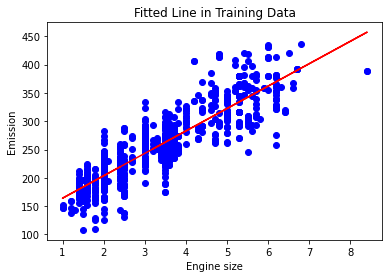

In [83]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

Text(0.5, 1.0, 'Fitted Line in Training Data')

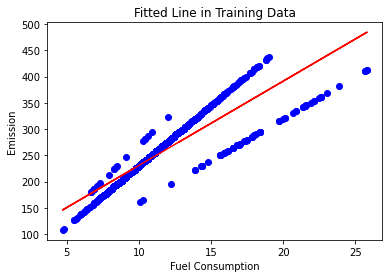

In [84]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

<a name='4.1.2'></a>
### 4.1.2 Polynomial Regression

In [99]:
# POLYNOMIAL REGRESSION (1)
clf1 = linear_model.LinearRegression()
train_y1_poly = clf1.fit(train_x1_poly, train_y1)
# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)

# POLYNOMIAL REGRESSION (2)
clf2 = linear_model.LinearRegression()
train_y2_poly = clf2.fit(train_x2_poly, train_y2)
# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)

Coefficients:  [[ 0.         51.69069137 -1.60981069]]
Intercept:  [105.2719419]
Coefficients:  [[ 0.         40.1928023  -0.89279758]]
Intercept:  [-78.22882339]


Text(0.5, 1.0, 'Fitted Line in Training Data')

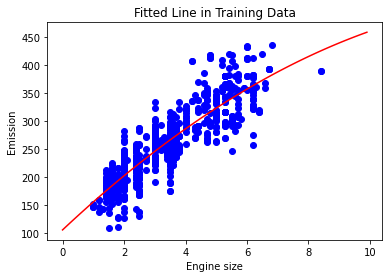

In [85]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

Text(0.5, 1.0, 'Fitted Line in Training Data')

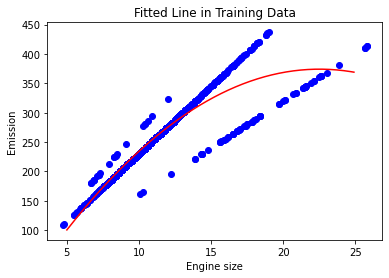

In [86]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
XX = np.arange(5.0, 25.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

<a name='4'></a>
## 4.2 Test

<a name='4'></a>
### 4.2.1 Linear Regression

In [128]:
test_y1_ = regr1.predict(test_x1)
test_y2_ = regr2.predict(test_x2)

<a name='4'></a>
### 4.2.2 Polynomial Regression

In [129]:
test_x1_poly = poly.fit_transform(test_x1)
test_y1_poly = clf1.predict(test_x1_poly)

test_x2_poly = poly.fit_transform(test_x2)
test_y2_poly = clf2.predict(test_x2_poly)

<a name='5'></a>
# 5. Model Evaluation

<a name='5.1'></a>
### 5.1 Linear Regression

Mean absolute error: 23.43
Residual sum of squares (MSE): 932.78
R2-score: 0.77


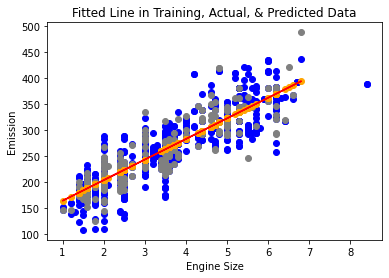

In [130]:
from sklearn.metrics import r2_score

plt.scatter(train_x1, train_y1,  color='blue')
plt.scatter(test_x1, test_y1,  color='grey')
plt.scatter(test_x1, test_y1_,  color='orange')
plt.plot(test_x1, regr1.coef_[0][0]*test_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_ - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1 , test_y1_) )

Mean absolute error: 21.08
Residual sum of squares (MSE): 868.73
R2-score: 0.78


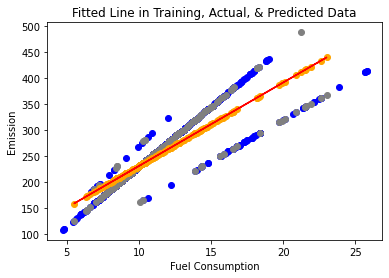

In [131]:
from sklearn.metrics import r2_score

plt.scatter(train_x2, train_y2,  color='blue')
plt.scatter(test_x2, test_y2,  color='grey')
plt.scatter(test_x2, test_y2_,  color='orange')
plt.plot(test_x2, regr2.coef_[0][0]*test_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_ - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_ - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2 , test_y2_) )

<a name='5.1'></a>
### 5.2 Polynomial Regression

Mean absolute error: 23.42
Residual sum of squares (MSE): 925.91
R2-score: 0.71


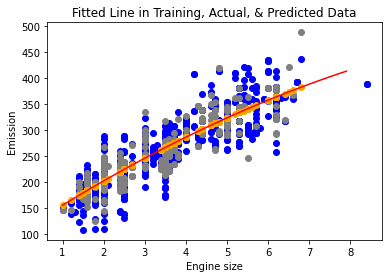

In [132]:
from sklearn.metrics import r2_score

plt.scatter(train_x1, train_y1,  color='blue')
plt.scatter(test_x1, test_y1,  color='grey')
plt.scatter(test_x1, test_y1_poly,  color='orange')
XX = np.arange(1.0, 8.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_poly - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_poly - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1_poly , test_y1) )

Mean absolute error: 13.39
Residual sum of squares (MSE): 603.14
R2-score: 0.83


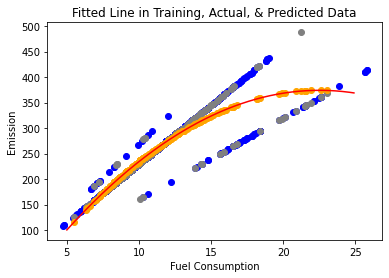

In [134]:
from sklearn.metrics import r2_score

plt.scatter(train_x2, train_y2,  color='blue')
plt.scatter(test_x2, test_y2,  color='grey')
plt.scatter(test_x2, test_y2_poly,  color='orange')
XX = np.arange(5.0, 25.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_poly - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_poly - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2_poly , test_y2) )

<a name='6'></a>
# 6. Conclusion

In simple linear regression algorithm, the R_Squared and the mean absolute error scores are 0.74 and 25.43 respectively for the engine size and emission case. The R_Squared and the mean absolute error scores are 0.78 and 23.33 respectively for the fuel consumption and emission case. In polynomial regression algorithm, the R_Squared and the mean absolute error scores are 0.71 and 21.08 respectively for the engine size and emission case. The R_Squared and the mean absolute error scores are 0.83 and 13.39 respectively for the fuel consumption and emission case.

In engine size case, the scores from linear regression are slightly better than polynomial regression. In fuel consumption case, the scores from polynomial regression are slightly better than linear regression. From this situation, we can conclude that the use case for each algorithm is really depends on the data pattern. To see the data pattern, before modelling, we can take a peek at the scatter plot data. If it has a turn or many turns pattern in it, we could use polynomial regression. But if it doesnt, we could just use linear regression. If the data pattern isn't clear, we could try both algorithm just like we did in this analysis.